# Case Study: Diabetes Prediction

## About
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#### Columns
- `gender`: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

- `age`: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

- `hypertension`: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

- `heart_disease`: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease. 

- `smoking_history`: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

- `bmi`: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

- `HbA1c_level`: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

- `blood_glucose_level`: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

- `diabetes`: diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE

## Data Section

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Exploring data columns

### `gender`

In [5]:
np.unique(df['gender'], return_counts = True)

(array(['Female', 'Male', 'Other'], dtype=object),
 array([58552, 41430,    18], dtype=int64))

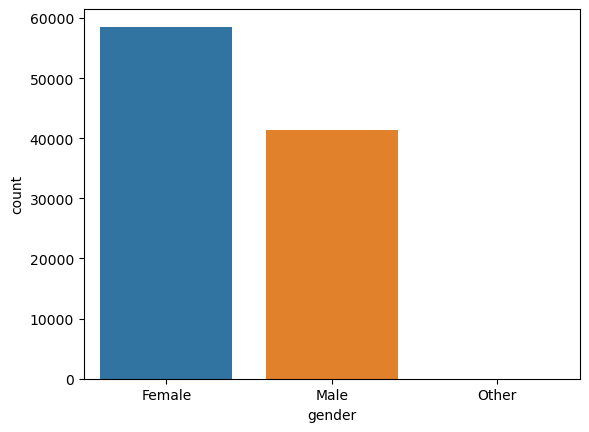

In [6]:
sns.countplot(x = df['gender']);

In [7]:
df.groupby(['gender', 'diabetes']).size()

gender  diabetes
Female  0           54091
        1            4461
Male    0           37391
        1            4039
Other   0              18
dtype: int64

In [8]:
print('Men with diabetes: ', 4039)
print('Women with diabetes: ', 4461)
print('')
print('Men without diabetes: ', 37391)
print('Women without diabetes:',  54091)

Men with diabetes:  4039
Women with diabetes:  4461

Men without diabetes:  37391
Women without diabetes: 54091


In [9]:
men_with_diabetes_perc = (4039 / len(df)) * 100
print('Men with diabetes %: ', men_with_diabetes_perc)
women_with_diabetes_perc = (4461 / len(df)) * 100
print('Women with diabetes %: ', women_with_diabetes_perc)

Men with diabetes %:  4.039000000000001
Women with diabetes %:  4.460999999999999


### `age`

In [10]:
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [11]:
df[df['age']== df['age'].min()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
2049,Female,0.08,0,0,No Info,13.35,3.5,145,0
3742,Male,0.08,0,0,No Info,12.80,6.6,80,0
9683,Female,0.08,0,0,No Info,11.88,5.7,80,0
13162,Male,0.08,0,0,No Info,27.32,6.1,126,0
16028,Male,0.08,0,0,No Info,14.40,6.0,90,0
29551,Male,0.08,0,0,No Info,13.55,6.1,145,0
30060,Male,0.08,0,0,No Info,12.89,6.5,145,0
32402,Male,0.08,0,0,No Info,13.68,5.0,85,0
33684,Male,0.08,0,0,No Info,30.64,6.6,130,0


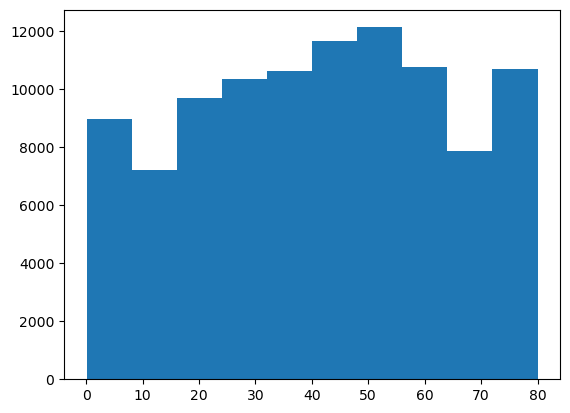

In [12]:
plt.hist(df['age']);

In [13]:
df_age = df.groupby(['age', 'diabetes']).size()

In [14]:
df[df['age'] == 40][df['diabetes']==1]

C:\Users\DELL\AppData\Local\Temp\ipykernel_9720\1547481947.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['age'] == 40][df['diabetes']==1]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
580,Female,40.0,0,0,never,35.07,6.5,130,1
699,Female,40.0,0,0,never,31.16,6.6,159,1
2267,Male,40.0,0,0,never,32.72,6.6,159,1
2316,Female,40.0,0,0,No Info,21.79,8.2,300,1
6928,Female,40.0,0,0,never,26.89,7.5,300,1
...,...,...,...,...,...,...,...,...,...
97134,Female,40.0,0,0,never,37.51,6.0,160,1
97678,Female,40.0,0,0,never,30.32,8.2,200,1
98141,Male,40.0,0,0,never,35.35,5.7,155,1
98383,Male,40.0,0,1,not current,27.32,7.0,140,1


### `smoking_history`

In [15]:
np.unique(df['smoking_history'], return_counts = True)

(array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
       dtype=object),
 array([35816,  9286,  4004,  9352, 35095,  6447], dtype=int64))

In [16]:
df['smoking_history'].describe()

count      100000
unique          6
top       No Info
freq        35816
Name: smoking_history, dtype: object

In [17]:
df.groupby(['smoking_history', 'diabetes']).size()

smoking_history  diabetes
No Info          0           34362
                 1            1454
current          0            8338
                 1             948
ever             0            3532
                 1             472
former           0            7762
                 1            1590
never            0           31749
                 1            3346
not current      0            5757
                 1             690
dtype: int64

In [18]:
len(df[df['smoking_history']== 'never']), len(df[df['smoking_history']== 'former']), len(df[df['smoking_history']== 'No Info']) 

(35095, 9352, 35816)

In [19]:
diabetes_rate = pd.DataFrame({'smoking_history': ['never', 'former', 'No info'],
                              'sampling': [35095, 9352, 35816],
                              'with_diabetes': [3346, 1590, 1454]})
diabetes_rate.sort_values('with_diabetes', ascending = False)


,smoking_history,sampling,with_diabetes
0,never,35095,3346
1,former,9352,1590
2,No info,35816,1454


### `bmi`

In [20]:
df['bmi'].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

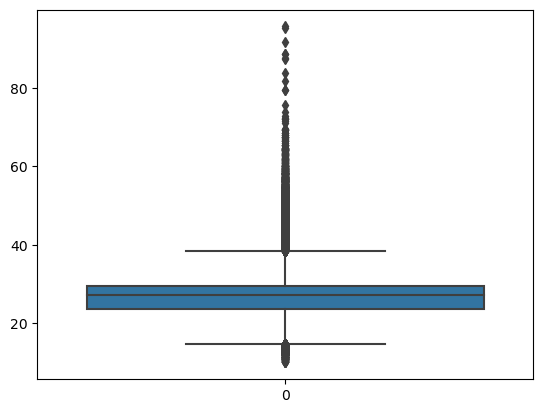

In [21]:
sns.boxplot(df['bmi']);

In [22]:
df[df['bmi'] > 71.55]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
4551,Female,45.0,0,0,never,88.72,7.0,300,1
20355,Female,55.0,0,0,former,73.77,6.6,160,0
20591,Female,39.0,0,0,No Info,79.48,4.8,155,0
21960,Male,47.0,0,0,never,72.28,4.5,90,0
22454,Male,19.0,0,0,No Info,87.51,3.5,85,0
24186,Male,49.0,0,0,former,83.74,6.8,155,1
28645,Female,42.0,0,0,never,72.89,6.8,280,1
54336,Female,25.0,0,0,current,75.78,6.1,100,0
58318,Female,36.0,0,0,never,79.46,6.2,220,1
69549,Male,38.0,0,0,never,91.82,6.0,160,0


In [23]:
df.drop(df[df['bmi'] > 71.55].index, axis=0, inplace = True)

In [24]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [25]:
df['bmi'].describe()

count    99983.000000
mean        27.311422
std          6.597698
min         10.010000
25%         23.630000
50%         27.320000
75%         29.580000
max         71.550000
Name: bmi, dtype: float64

In [26]:
df[df['bmi'] < 10.16]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3630,Female,80.0,0,0,No Info,10.01,6.0,100,0
6369,Male,8.0,0,0,No Info,10.01,6.0,140,0
73319,Male,11.0,0,0,No Info,10.14,6.1,160,0
81268,Male,38.0,0,0,never,10.08,6.1,130,0


In [27]:
df.drop(df[df['bmi'] < 10.16].index, axis = 0, inplace = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### `HbA1c_level`

In [28]:
df['HbA1c_level'].describe()

count    99979.000000
mean         5.527419
std          1.070694
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

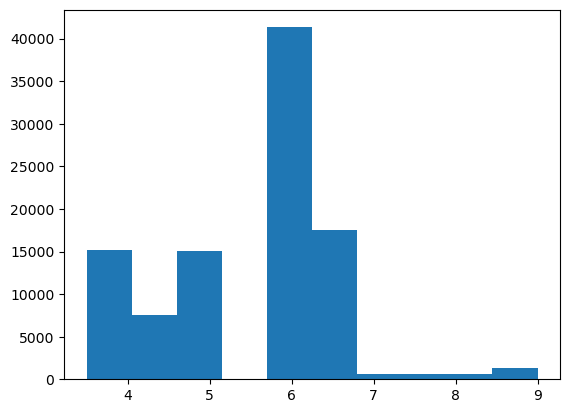

In [29]:
plt.hist(df['HbA1c_level']);

In [30]:
df.groupby(['HbA1c_level', 'diabetes']).size()

HbA1c_level  diabetes
3.5          0           7661
4.0          0           7542
4.5          0           7583
4.8          0           7596
5.0          0           7471
5.7          0           7709
             1            704
5.8          0           7662
             1            659
6.0          0           7644
             1            647
6.1          0           7393
             1            651
6.2          0           7620
             1            647
6.5          0           7748
             1            612
6.6          0           7856
             1            682
6.8          1            640
7.0          1            633
7.5          1            643
8.2          1            661
8.8          1            661
9.0          1            654
dtype: int64

### `blood_glucose_level`

In [31]:
df['blood_glucose_level'].describe()

count    99979.000000
mean       138.055492
std         40.703158
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

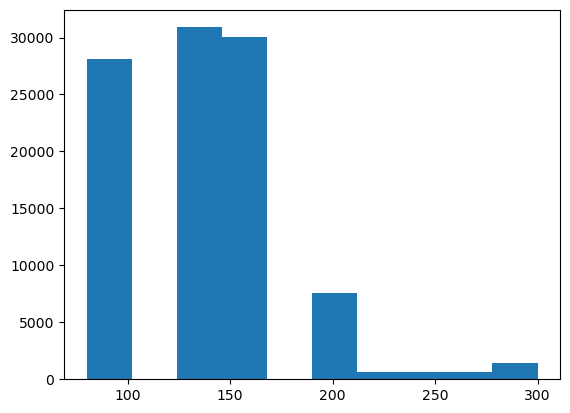

In [32]:
plt.hist(df['blood_glucose_level']);

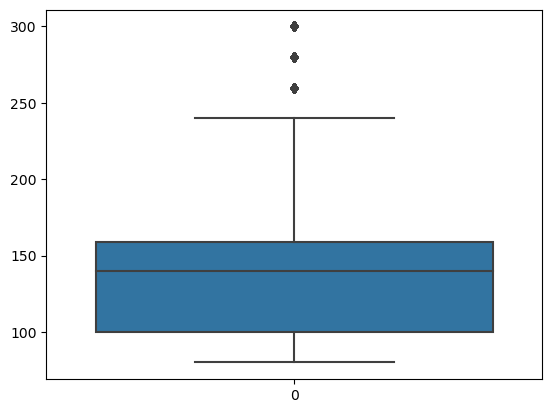

In [33]:
sns.boxplot(df['blood_glucose_level']);

In [34]:
df[df['blood_glucose_level'] > 250]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
38,Male,50.0,1,0,current,27.32,5.7,260,1
94,Female,60.0,0,0,never,27.32,7.5,300,1
104,Female,80.0,1,0,never,27.32,6.8,280,1
125,Female,77.0,0,0,never,31.70,6.5,280,1
142,Female,80.0,0,0,former,21.97,7.0,300,1
...,...,...,...,...,...,...,...,...,...
99763,Female,50.0,0,0,never,35.91,6.0,280,1
99826,Male,63.0,0,1,No Info,27.32,6.6,300,1
99867,Male,64.0,1,0,former,33.12,5.7,300,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1


In [35]:
df.drop(df[df['blood_glucose_level'] > 250].index, axis = 0, inplace = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


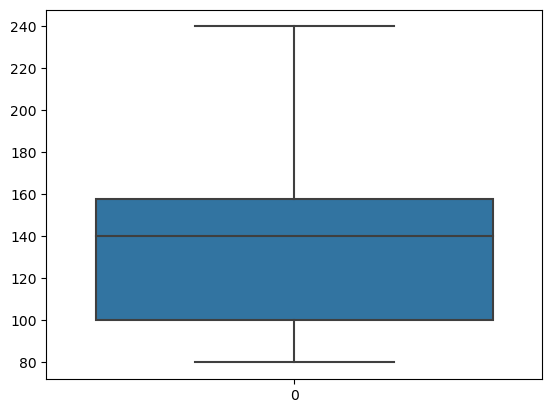

In [36]:
sns.boxplot(df['blood_glucose_level']);

### **`diabetes (target)`**

In [37]:
np.unique(df['diabetes'], return_counts = True)

(array([0, 1], dtype=int64), array([91485,  6458], dtype=int64))

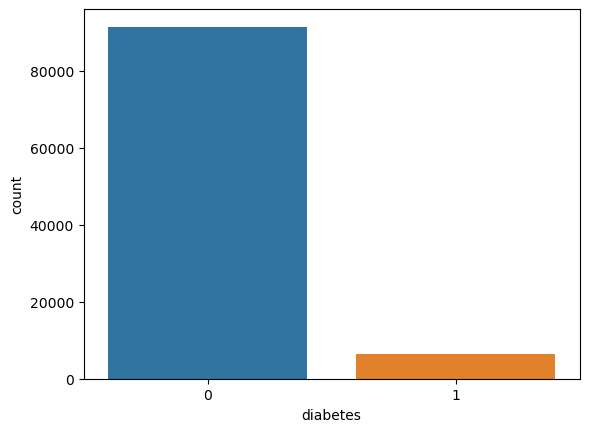

In [38]:
sns.countplot(x= df['diabetes']);

> ## Note
> This database is very unbalanced, which means that it has more samples of people without diabetes than with. It can be a problem for the machine learning Models.

## Data Separation - X and y

In [39]:
X = df.iloc[:, 0:8].values
X.shape

(97943, 8)

In [40]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [41]:
y = df.iloc[:,8].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Data Transformation

In [42]:
label_gender = LabelEncoder()
label_smoke = LabelEncoder()
X[:,0] = label_gender.fit_transform(X[:,0])
X[:,4] = label_smoke.fit_transform(X[:,4])
X

array([[0, 80.0, 0, ..., 25.19, 6.6, 140],
       [0, 54.0, 0, ..., 27.32, 6.6, 80],
       [1, 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       [1, 66.0, 0, ..., 27.83, 5.7, 155],
       [0, 24.0, 0, ..., 35.42, 4.0, 100],
       [0, 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [43]:
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(97943, 8)

In [44]:
X

array([[-0.83887605,  1.71266921, -0.27722352, ..., -0.30910554,
         1.04767991,  0.13834269],
       [-0.83887605,  0.55633861, -0.27722352, ...,  0.01651995,
         1.04767991, -1.55462885],
       [ 1.19026714, -0.59999198, -0.27722352, ...,  0.01651995,
         0.19161715,  0.64623414],
       ...,
       [ 1.19026714,  1.09002966, -0.27722352, ...,  0.09448661,
         0.19161715,  0.56158557],
       [-0.83887605, -0.77788899, -0.27722352, ...,  1.25481407,
        -1.42539027, -0.990305  ],
       [-0.83887605,  0.68976138, -0.27722352, ..., -0.7310428 ,
         1.04767991, -1.27246692]])

## Split Data Into Train / Test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78354, 8), (78354,), (19589, 8), (19589,))

## Models
- Evaluation Metric: **Accuracy**

### Support Vectors Machine (SVM)

In [46]:
svm = SVC(random_state = 0)
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)
print('Train Accuracy: ', svm.score(X_train, y_train))
print('Test Accuracy: ', svm.score(X_test, y_test))

Train Accuracy:  0.964137121270133
Test Accuracy:  0.9643677574148757


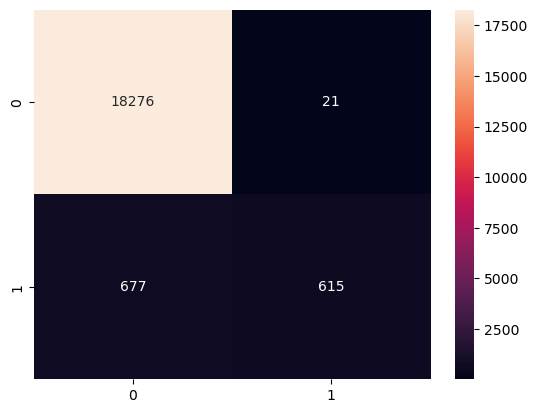

In [47]:
sns.heatmap(confusion_matrix(y_test, predictions_svm), annot = True, fmt='g');

In [48]:
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.97      0.48      0.64      1292

    accuracy                           0.96     19589
   macro avg       0.97      0.74      0.81     19589
weighted avg       0.96      0.96      0.96     19589



### RandomForest

In [49]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
print('Train Accuracy: ', rf.score(X_train, y_train))
print('Test Accuracy: ', rf.score(X_test, y_test))

Train Accuracy:  0.9991959568113944
Test Accuracy:  0.9687069273571902


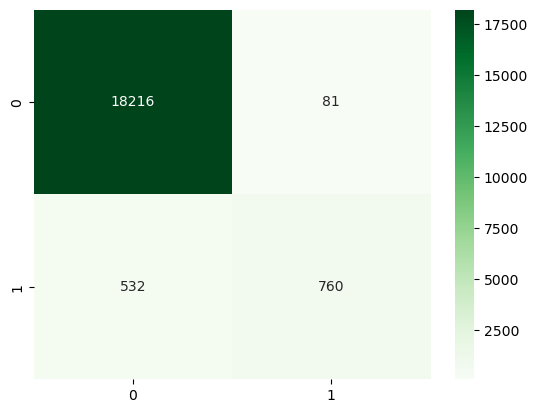

In [50]:
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot = True, fmt='g', cmap = 'Greens');

In [51]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.90      0.59      0.71      1292

    accuracy                           0.97     19589
   macro avg       0.94      0.79      0.85     19589
weighted avg       0.97      0.97      0.97     19589



### Gradient Boosting

In [52]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)
print('Train Accuracy: ', gb.score(X_train, y_train))
print('Test Accuracy: ', gb.score(X_test, y_test))

Train Accuracy:  0.9718967761696914
Test Accuracy:  0.9711062330899994


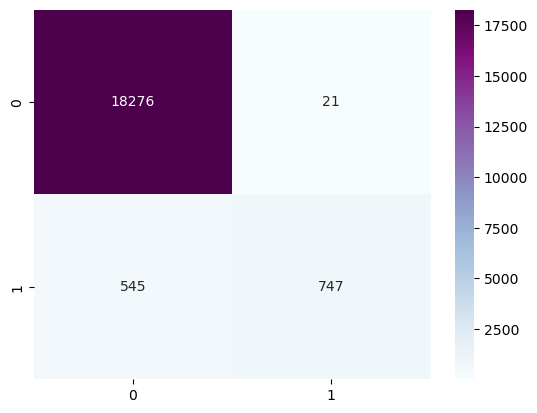

In [53]:
sns.heatmap(confusion_matrix(y_test, predictions_gb), annot = True, fmt='g', cmap = 'BuPu');

In [54]:
print(classification_report(y_test, predictions_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.97      0.58      0.73      1292

    accuracy                           0.97     19589
   macro avg       0.97      0.79      0.85     19589
weighted avg       0.97      0.97      0.97     19589



### Neural Networks

In [55]:
nn = MLPClassifier(random_state = 0)
nn.fit(X_train, y_train)
predictions_nn = nn.predict(X_test)
print('Train Accuracy: ', nn.score(X_train, y_train))
print('Test Accuracy: ', nn.score(X_test, y_test))

Train Accuracy:  0.971526661051127
Test Accuracy:  0.9705446934504058


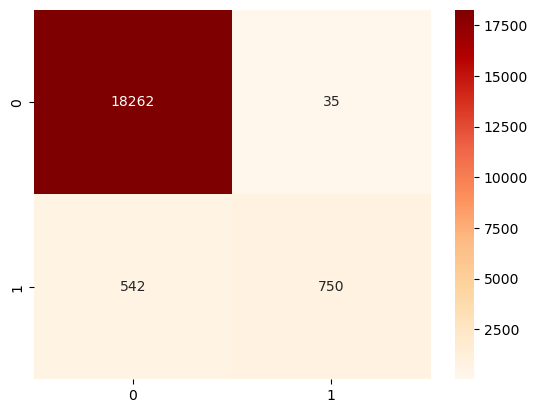

In [56]:
sns.heatmap(confusion_matrix(y_test, predictions_nn), annot = True, fmt='g', cmap='OrRd');

In [57]:
print(classification_report(y_test, predictions_nn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.96      0.58      0.72      1292

    accuracy                           0.97     19589
   macro avg       0.96      0.79      0.85     19589
weighted avg       0.97      0.97      0.97     19589



> ## Note
> All the models got a great result looking only at Accuracy, but they are getting difficult to identify which person has Diabetes and it is a big problem for us. As mencioned above, the data is very desbalanced, that's why the models couldn't perform better. We can try to balance this data by two options: subsampling or oversampling it. As this base has little information about people who have diabetes, I will choose for oversampling it using a specific library, which will do some distance calculations to generate new synthetic data.

## Oversampling - SMOTE

In [58]:
smote = SMOTE(sampling_strategy='minority')

In [59]:
X_over, y_over = smote.fit_resample(X, y)

In [60]:
# Original dataset
np.unique(y, return_counts = True)

(array([0, 1], dtype=int64), array([91485,  6458], dtype=int64))

In [61]:
# Oversampled dataset
np.unique(y_over, return_counts = True)

(array([0, 1], dtype=int64), array([91485, 91485], dtype=int64))

In [62]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.20, stratify=y_over, random_state = 0)
# Oversampled Split
X_train_over.shape, y_train_over.shape, X_test_over.shape, y_test_over.shape

((146376, 8), (146376,), (36594, 8), (36594,))

In [63]:
# Original Split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78354, 8), (78354,), (19589, 8), (19589,))

## Models on Oversampled Data

### Support Vectores Machine (SVM)


In [64]:
# svm_over = SVC(random_state=0)
# svm_over.fit(X_train_over, y_train_over)
# predictions_svm = svm_over.predict(X_test_over)
# print('Train Accuracy: ', svm_over.score(X_train_over, y_train_over))
# print('Test Accuracy: ', svm_over.score(X_test_over, y_test_over))

# --------- this model takes a long time to run. If you want to run it, you can uncomment it. 
# this model had an accuracy of approximately 89%

In [65]:
#sns.heatmap(confusion_matrix(y_test_over, predictions_svm), annot = True, fmt='g');

In [66]:
#print(classification_report(y_test_over, predictions_svm))

### Random Forest

In [67]:
rf_over = RandomForestClassifier(random_state=0)
rf_over.fit(X_train_over, y_train_over)
predictions_rf = rf_over.predict(X_test_over)
print('Train Accuracy: ', rf_over.score(X_train_over, y_train_over))
print('Test Accuracy: ', rf_over.score(X_test_over, y_test_over))

Train Accuracy:  0.999549106410887
Test Accuracy:  0.9789036454063508


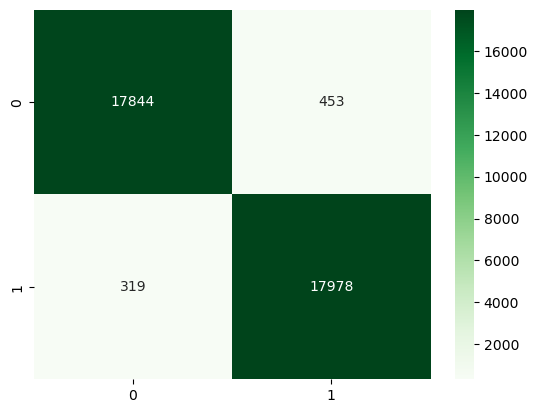

In [68]:
sns.heatmap(confusion_matrix(y_test_over, predictions_rf), annot = True, fmt='g', cmap = 'Greens');

In [69]:
print(classification_report(y_test_over, predictions_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18297
           1       0.98      0.98      0.98     18297

    accuracy                           0.98     36594
   macro avg       0.98      0.98      0.98     36594
weighted avg       0.98      0.98      0.98     36594



### Gradient Boosting

In [70]:
gb_over = GradientBoostingClassifier(random_state=0)
gb_over.fit(X_train_over, y_train_over)
predictions_gb = gb_over.predict(X_test_over)
print('Train Accuracy: ', gb_over.score(X_train_over, y_train_over))
print('Test Accuracy: ', gb_over.score(X_test_over, y_test_over))

Train Accuracy:  0.9531685522216757
Test Accuracy:  0.9525332021642893


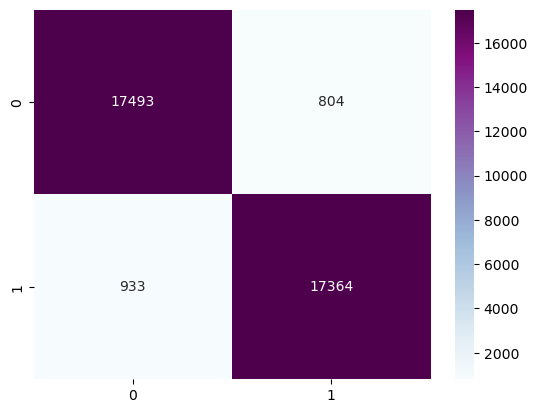

In [71]:
sns.heatmap(confusion_matrix(y_test_over, predictions_gb), annot = True, fmt='g', cmap = 'BuPu');

In [72]:
print(classification_report(y_test_over, predictions_gb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     18297
           1       0.96      0.95      0.95     18297

    accuracy                           0.95     36594
   macro avg       0.95      0.95      0.95     36594
weighted avg       0.95      0.95      0.95     36594



### Neural Networks

In [73]:
nn_over = MLPClassifier(random_state=0)
nn_over.fit(X_train_over, y_train_over)
predictions_nn = nn_over.predict(X_test_over)
print('Train Accuracy: ', nn_over.score(X_train_over, y_train_over))
print('Test Accuracy: ', nn_over.score(X_test_over, y_test_over))

Train Accuracy:  0.9145078428157621
Test Accuracy:  0.9114882221129147


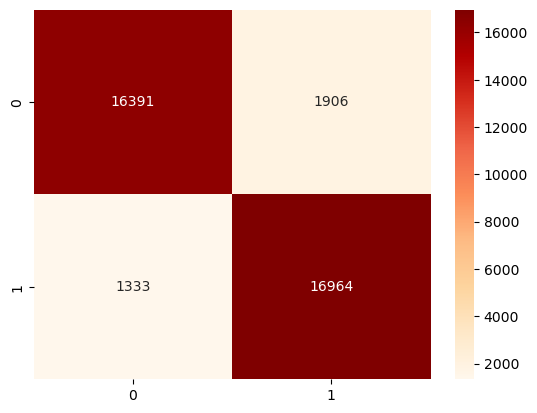

In [74]:
sns.heatmap(confusion_matrix(y_test_over, predictions_nn), annot = True, fmt='g', cmap='OrRd');

In [75]:
print(classification_report(y_test_over, predictions_nn))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     18297
           1       0.90      0.93      0.91     18297

    accuracy                           0.91     36594
   macro avg       0.91      0.91      0.91     36594
weighted avg       0.91      0.91      0.91     36594



# Conclusion
As expected, after adding more information about people with diabetes, the results of the models had a big jump, since the data set was extremely balanced. This way, the algorithms were able to identify possible people with the disease much more clearly. But, the best one was Random Forest.

**Note:** The new information added in the Dataframe is completely synthetic, which just means that for more efficient results it is important to have more real information about people with diabetes. What was done serves as an insight for the customer or company.

# Testing Predictions and Saving Model

## Random Forest

In [76]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [77]:
X_pred = np.array([['Male', 70, 1, 1, 'never', 35, 9, 160]])
X_pred

array([['Male', '70', '1', '1', 'never', '35', '9', '160']], dtype='<U11')

In [78]:
X_pred[:, 0] = label_gender.transform(X_pred[:, 0])
X_pred[:, 4] = label_smoke.transform(X_pred[:, 4])

X_pred

array([['1', '70', '1', '1', '4', '35', '9', '160']], dtype='<U11')

In [79]:
X_pred = scaler.transform(X_pred)
X_pred

array([[1.19026714, 1.26792667, 3.60719754, 5.09429521, 0.96802009,
        1.19060622, 3.33051392, 0.70266653]])

In [80]:
rf_over.predict(X_pred)

array([1], dtype=int64)

In [81]:
# Saving model
data = {'model': rf_over, 'encoder_gender': label_gender, 'encoder_smoking':label_smoke, 'scaler': scaler}
with open('model_package_complete.pkl', 'wb') as file:
    pickle.dump(data, file)

In [82]:
with open('model_package_complete.pkl', 'rb') as file:
    data = pickle.load(file)
    
label_gender = data['encoder_gender']
label_smoke = data['encoder_smoking']
scaler = data['scaler']

In [83]:
rf_over.predict(X_pred)

array([1], dtype=int64)